In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv('Cleaned.csv')
df1.head()

,Unnamed: 0,city,latitude,longitude,attacktype,targtype,targsubtype,target,weaptype,weapsubtype,gname,Month,Day,Year
0,0,Samastipur,25.863042,85.781004,2036,876,296,Lalit Narayan Mishra and a legislator,2121,674,1,1,2,1975
1,1,Unknown,33.778175,76.576171,2036,368,29,A bus station in Kashmir,2121,75,4,3,29,1997
2,2,Dhalai district,23.846698,91.909924,2036,313,86,Border Patrol Guards,2121,265,62,11,7,1997
3,3,Hyderabad,17.376812,78.487812,2036,1538,19,People leaving a party. Wounded included Moha...,2121,75,1414,11,19,1997
4,4,New Delhi,28.632381,77.220004,2036,1538,447,Civilians in New Delhi,2121,61,1414,1,9,1998


In [3]:
df1=df1.drop('Unnamed: 0',axis=1)

In [4]:
df1.head()

,city,latitude,longitude,attacktype,targtype,targsubtype,target,weaptype,weapsubtype,gname,Month,Day,Year
0,Samastipur,25.863042,85.781004,2036,876,296,Lalit Narayan Mishra and a legislator,2121,674,1,1,2,1975
1,Unknown,33.778175,76.576171,2036,368,29,A bus station in Kashmir,2121,75,4,3,29,1997
2,Dhalai district,23.846698,91.909924,2036,313,86,Border Patrol Guards,2121,265,62,11,7,1997
3,Hyderabad,17.376812,78.487812,2036,1538,19,People leaving a party. Wounded included Moha...,2121,75,1414,11,19,1997
4,New Delhi,28.632381,77.220004,2036,1538,447,Civilians in New Delhi,2121,61,1414,1,9,1998


In [5]:
x=df1.drop(['city','weaptype','target'],axis=1)
x

,latitude,longitude,attacktype,targtype,targsubtype,weapsubtype,gname,Month,Day,Year
0,25.863042,85.781004,2036,876,296,674,1,1,2,1975
1,33.778175,76.576171,2036,368,29,75,4,3,29,1997
2,23.846698,91.909924,2036,313,86,265,62,11,7,1997
3,17.376812,78.487812,2036,1538,19,75,1414,11,19,1997
4,28.632381,77.220004,2036,1538,447,61,1414,1,9,1998
...,...,...,...,...,...,...,...,...,...,...
4956,23.633224,85.514874,2036,417,19,53,1546,12,24,2015
4957,20.225002,85.418406,200,876,315,180,1546,12,25,2015
4958,18.343586,81.882528,592,876,315,180,1546,12,25,2015
4959,18.325329,81.429048,592,876,296,1564,383,12,26,2015


In [6]:
y=df1['weaptype']

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [9]:
import tensorflow as tf

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,PReLU
from tensorflow.keras.layers import Dropout

In [11]:
ans=Sequential()

In [12]:
ans.add(Dense(units=10,activation='ReLU'))
ans.add(Dense(units=8,activation='ReLU'))
ans.add(Dense(units=6,activation='ReLU'))
ans.add(Dense(units=4,activation='ReLU'))
ans.add(Dense(units=1,activation='linear'))

In [16]:
ans.compile(loss='MSE',optimizer='adam',metrics=['MSE'])

In [18]:
early=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=6,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [19]:
model=ans.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early)

Epoch 1/1000
250/250 [==============================] - 9s 5ms/step - loss: 3113503.2500 - MSE: 3113503.2500 - val_loss: 2825429.0000 - val_MSE: 2825429.0000
Epoch 2/1000
250/250 [==============================] - 1s 4ms/step - loss: 1353557.8750 - MSE: 1353557.8750 - val_loss: 235583.9531 - val_MSE: 235583.9531
Epoch 3/1000
250/250 [==============================] - 1s 4ms/step - loss: 195355.6250 - MSE: 195355.6250 - val_loss: 158813.6406 - val_MSE: 158813.6406
Epoch 4/1000
250/250 [==============================] - 1s 5ms/step - loss: 161855.6250 - MSE: 161855.6250 - val_loss: 138485.5781 - val_MSE: 138485.5781
Epoch 5/1000
250/250 [==============================] - 2s 7ms/step - loss: 147650.5000 - MSE: 147650.5000 - val_loss: 125483.7031 - val_MSE: 125483.7031
Epoch 6/1000
250/250 [==============================] - 1s 5ms/step - loss: 137712.1562 - MSE: 137712.1562 - val_loss: 117865.5859 - val_MSE: 117865.5859
Epoch 7/1000
250/250 [==============================] - 1s 4ms/step - 

In [ ]:
model.history.keys()

dict_keys(['loss', 'MSE', 'val_loss', 'val_MSE'])

In [20]:
y_pred1=ans.predict(x_test)

39/39 [==============================] - 0s 2ms/step


In [21]:
y_pred1.astype(int)

array([[1912],
       [2295],
       [1744],
       ...,
       [2054],
       [1854],
       [2059]])

In [22]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred1.astype(int))

0.8192045244401467

Text(0, 0.5, 'accuracy')

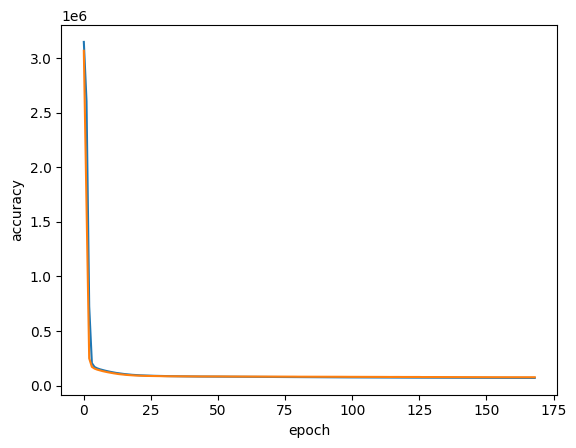

In [ ]:
plt.plot(model.history['MSE'])
plt.plot(model.history['val_MSE'])
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [24]:
from sklearn.ensemble import RandomForestRegressor
rnf=RandomForestRegressor()
rnf.fit(x_train,y_train)
y_pred2=rnf.predict(x_test)

In [25]:
r2_score(y_test,y_pred2)

0.9738920937667579